In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np


In [ ]:
# check the VIF of logistic regression -> some variables have serious multicollinarity issue 
data = pd.read_csv("cleaned_trainingdata.csv")

# drop some columns with severe multicollinearity 
data = data.drop(['default_risk', 'rx_common_total','rx_common_total_pct','rx_tired_total','rx_tired_total_pct',
         'rx_severe_total','rx_severe_total_pct','rx_motorability_total','rx_motorability_total_pct','RxMobileIndex',
         'RxMobileIndex_pct','lang_spoken_cd_SPA','credit_dpd_exposure', "weighted_full_health", 
        "credit_weighted_pct_dpd_overdue", 'credit_num_overage','hlth_pgm_slvrsnkr_pct_par', "rev_cms_er_ind",
                 "betos_o1g_ind", "ccsp_228_ind","betos_o1a_ind", "betos_o1b_ind", "bh_dema_ind", "ccsp_163_ind", 
        "ccsp_239_ind", "cmsd2_men_mad_ind",'person_id_syn' ], axis = 1)

data = data.drop(['betos_d1c_ind',
                  'betos_m2c_ind',
                  'betos_m5c_ind',
                  'betos_t1b_ind',
                  'betos_t1e_ind',	
                  'betos_t1h_ind',	
                  'betos_t2a_ind',	
                  'betos_y2_ind',
                  'bh_aoth_ind',
                  'bh_cdsb_ind',
                  'cci_score',
                  'ccsp_062_ind',	
                  'ccsp_130_ind',	
                  'ccsp_169_ind',	
                  'ccsp_205_ind',
                  'ccsp_236_ind',
                  'cms_dual_eligible_ind',
                  'cms_partd_ra_factor_amt',
                  'cms_risk_adj_payment_rate_a_amt',
                  'cms_risk_adj_payment_rate_b_amt',
                  'cms_risk_adjustment_factor_a_amt',
                  'cms_tot_ma_payment_amt',
                  'cmsd2_can_unc_neo/plycyth/myelo_ind',
                  'cmsd2_gus_m_genital_ind',	
                  'cmsd2_men_men_substance_ind',	
                  'cmsd2_mus_polyarthropath_ind',	
                  'cmsd2_mus_spondylopath_ind'], axis = 1)


In [ ]:
data.shape

(69572, 395)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
#Changing pandas dataframe to numpy array
y = data['transportation_issues']
X = data.drop('transportation_issues', axis = 1)
X = X.values
y = y.values

In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)


In [ ]:
X_train.shape

(62614, 367)

In [ ]:
# Oversample 
import imblearn
oversample = SMOTE(sampling_strategy = 1)
X_train_over50, y_train_over50 = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
counter = Counter(y_train_over50)
print(counter)

Counter({0: 53445, 1: 53445})


Neural Network Model

In [ ]:
# Neural network
initializer = keras.initializers.GlorotUniform()
model = Sequential()
model.add(Dense(512, input_shape=(???, ), activation='relu', kernel_initializer=initializer))
model.add(Dense(512, activation='relu',kernel_initializer=initializer))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Training model with oversampling (optimal batch_size is 32)
data_train_3 = model.fit(X_train_over50, y_train_over50, epochs=20, batch_size=128, verbose = 1 )

Epoch 1/500
836/836 [==============================] - 9s 11ms/step - loss: 0.4815 - accuracy: 0.7717
Epoch 2/500
836/836 [==============================] - 9s 11ms/step - loss: 0.2603 - accuracy: 0.8948
Epoch 3/500
836/836 [==============================] - 9s 11ms/step - loss: 0.1477 - accuracy: 0.9444
Epoch 4/500
836/836 [==============================] - 9s 11ms/step - loss: 0.0937 - accuracy: 0.9654
Epoch 5/500
836/836 [==============================] - 9s 11ms/step - loss: 0.0650 - accuracy: 0.9771
Epoch 6/500
836/836 [==============================] - 9s 11ms/step - loss: 0.0556 - accuracy: 0.9797
Epoch 7/500
836/836 [==============================] - 9s 11ms/step - loss: 0.0446 - accuracy: 0.9837
Epoch 8/500
836/836 [==============================] - 9s 11ms/step - loss: 0.0411 - accuracy: 0.9857
Epoch 9/500
836/836 [==============================] - 9s 10ms/step - loss: 0.0379 - accuracy: 0.9867
Epoch 10/500
836/836 [==============================] - 9s 11ms/step - loss: 0.030

In [ ]:
#Converting predictions to label: over20
y_pred = model.predict(X_test)
pred = list()
for i in range(len(y_pred)):
    if y_pred[i]>=0.5:
      pred.append(1)
    else:
      pred.append(0)
pred[:20]  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 80.84219603334292


In [ ]:
# Confusion Matrix: over20
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[5401,  529],
       [ 804,  224]])

In [ ]:
#ROC Score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, y_pred)
roc_value

0.6425133365266631

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      5930
           1       0.30      0.22      0.25      1028

    accuracy                           0.81      6958
   macro avg       0.58      0.56      0.57      6958
weighted avg       0.79      0.81      0.80      6958



In [ ]:
data.skew()

betos_d1d_ind     7.864929
betos_m1b_ind    -3.516305
betos_m5b_ind     3.670691
betos_m5d_ind    -0.064716
betos_o1e_ind     0.286699
                   ...    
count_rsk         2.193731
count_skn         8.814870
count_sns        20.705594
count_sor         2.790282
count_vco         3.705730
Length: 368, dtype: float64

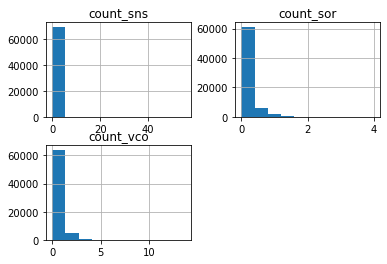

In [ ]:
numdata = data.select_dtypes(include=['float64'])
numdata.shape
numdata.iloc[:,130:].hist()
data["count_sns"].hist()